<a href="https://colab.research.google.com/github/eloiza-dias/cnn-correlation-code/blob/main/Correlation_greatest_error_A549.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#estruturação dos dados
import numpy as np
#gerar gráfico
import seaborn as sns
#gerar gráfico
import matplotlib.pyplot as plt
#Carregar o modelo
from keras.models import load_model
#salvar/carregar arquivos em diferentes formatos
import joblib



In [ ]:
pip install util-gfsilveira

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Importando o modelo contendo os valores previstos para o número de células nas imagens

modelo_maior_erro = load_model('/content/drive/MyDrive/1_Informações_scripts/model__A549_regressao_maior_erro_18_PACIEN_500_2022-6-29.h5')
modelo_maior_erro

In [ ]:
#71 IMAGENS SEPARADAS RANDOMICAMENTE - 40% TESTE
X_test_maior_erro = joblib.load('/content/drive/MyDrive/1_Informações_scripts/2_images_de_X_test_a549_pior_modelo_18_PACIENCE_500_2022-6-29.gz') #carregando arquivo
X_test_maior_erro.shape

(71, 200, 200, 3)

In [ ]:
#71 ROTULOS IMAGENS EM X
y_test_maior_erro = joblib.load('/content/drive/MyDrive/1_Informações_scripts/2_images_de_y_test_a549_pior_modelo_18_PACIENCE_500_2022-6-29.gz') #carregando arquivo
y_test_maior_erro.shape

(71,)

In [ ]:
#ROTULOS SALVOS EM LISTA
lista_observado_maior_erro = list(y_test_maior_erro)
len(lista_observado_maior_erro)

71

In [ ]:
#PREDIÇÃO SALVO EM LISTA
dados_prev = modelo_maior_erro.predict(X_test_maior_erro) #valores preditos usando .predict
lista_previsto_maior_erro = dados_prev.flatten().tolist() #.flatten converte as imagens em unico array/.tolist criando lista a partir de dados em formato array
len(lista_previsto_maior_erro) #print

71

In [ ]:
import pandas as pd #Chamando pandas para criar Dataframe
from scipy.stats.stats import pearsonr as stats #importando a biblioteca para gráfico de correlação

In [ ]:
#DATAFRAME - ORGANIZAÇÃO DAS LISTAS
#COLUNA 1 ROTULO/ COLUNA 2 PREDITO
df_maior_erro = pd.DataFrame(zip(lista_observado_maior_erro,lista_previsto_maior_erro), 
                             columns = ['Observed values','Lista preditos'])
df_maior_erro.tail()

,Observed values,Lista preditos
66,950,941.773682
67,899,1009.786804
68,1041,949.071838
69,945,937.210266
70,1124,998.819702


In [ ]:
#ARREDONDANDO O PREDITO ('lista preditos')
teste = round(df_maior_erro['Lista preditos'],2) #arrendodando para duas casas
df_maior_erro['Predicted values'] = teste #criando a coluna com esses valores
df_maior_erro.head() #5 primeiros valores

,Observed values,Lista preditos,Predicted values
0,963,887.128784,887.13
1,841,971.162720,971.16
2,821,880.695068,880.70
3,876,970.960693,970.96
4,944,714.504456,714.50


In [ ]:
#REORGANIZANDO AS COLUNAS
df_maior_erro = df_maior_erro.reindex(columns=['Observed values','Predicted values','Lista preditos']) #reindex para alterar a ordem das colunas
df_maior_erro.head()

,Observed values,Predicted values,Lista preditos
0,963,887.13,887.128784
1,841,971.16,971.162720
2,821,880.70,880.695068
3,876,970.96,970.960693
4,944,714.50,714.504456


In [ ]:
#BIBLIOTECA CORRELAÇÃO
from scipy.stats.stats import spearmanr as spearman #importando a biblioteca para gráfico de correlação


In [ ]:
df_maior_erro = df_maior_erro[df_maior_erro['Observed values'] > 300]


In [ ]:
#CALCULO DE CORRELAÇÃO
col1_obt = 0 #dados observados - Observed values
col2_prev = 1 #valores preditos - Predicted values
pear_pos_maior_erro = stats(df_maior_erro[df_maior_erro.columns[col1_obt]], 
                            df_maior_erro[df_maior_erro.columns[col2_prev]])


<Figure size 1080x1080 with 0 Axes>

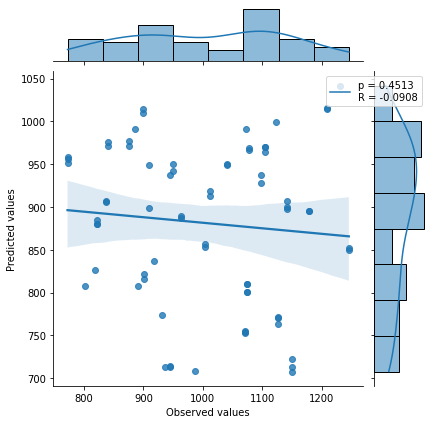

In [ ]:
plt.figure(figsize=(15,15)) #tam figura

sns.jointplot(
    x=df_maior_erro.columns[col1_obt], #eixo x - valores observados
    y=df_maior_erro.columns[col2_prev], #eixo y - valores preditos
    kind='reg', #regressão
    data=df_maior_erro #dados da dataframe
)

#condicional para o valor de p
if pear_pos_maior_erro[1] < 0.01:
  plt.legend(['p < ' + '0.01' + '\nR = ' + str(round(pear_pos_maior_erro[0], 4))]) #calculando p e relse:
else: 
  plt.legend(['p = ' + str(round(pear_pos_maior_erro[1],4)) + '\nR = ' + str(round(pear_pos_maior_erro[0], 4))]) #calculando p e r
